In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [12]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [13]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

Replicating images to training, validation, and test directories

In [14]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

t_data = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
v_data = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_data = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


preprocessing of data


Created a dataset instance with 1000 random samples and a vector size of 16 for each sample, using a NumPy array

In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [22]:
for data_batch, labels_batch in t_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Building a few convolution for dogs vs. cats

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

in1 = keras.Input(shape=(180, 180, 3))
yas1 = layers.Rescaling(1./255)(in1)
yas1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(yas1)
yas1 = layers.MaxPooling2D(pool_size=2)(yas1)
yas1 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(yas1)
yas1 = layers.MaxPooling2D(pool_size=2)(yas1)
yas1 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(yas1)
yas1 = layers.MaxPooling2D(pool_size=2)(yas1)
yas1 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas1)
yas1 = layers.MaxPooling2D(pool_size=2)(yas1)
yas1 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas1)
yas1 = layers.Flatten()(yas1)
yas1 = layers.Dropout(0.5)(yas1)
output_1 = layers.Dense(1, activation="sigmoid")(yas1)
model_1 = keras.Model(inputs=in1, outputs=output_1)

Giving the model for training

In [25]:
model_1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [26]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [28]:
callback_1000 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_1 = model_1.fit(
    t_data,
    epochs=20,
    validation_data=v_data,
    callbacks=callback_1000)

Epoch 1/20
63/63 [==============================] - 15s 83ms/step - loss: 0.6941 - accuracy: 0.5120 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 5s 78ms/step - loss: 0.6908 - accuracy: 0.5150 - val_loss: 0.6754 - val_accuracy: 0.5980
Epoch 3/20
63/63 [==============================] - 4s 61ms/step - loss: 0.6580 - accuracy: 0.6040 - val_loss: 0.6598 - val_accuracy: 0.5810
Epoch 4/20
63/63 [==============================] - 5s 71ms/step - loss: 0.6324 - accuracy: 0.6450 - val_loss: 0.6790 - val_accuracy: 0.5580
Epoch 5/20
63/63 [==============================] - 7s 100ms/step - loss: 0.6132 - accuracy: 0.6665 - val_loss: 0.6048 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 4s 63ms/step - loss: 0.5653 - accuracy: 0.7125 - val_loss: 0.5879 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 4s 58ms/step - loss: 0.5077 - accuracy: 0.7555 - val_loss: 0.5943 - val_accuracy: 0.7090
Epoch 8/20


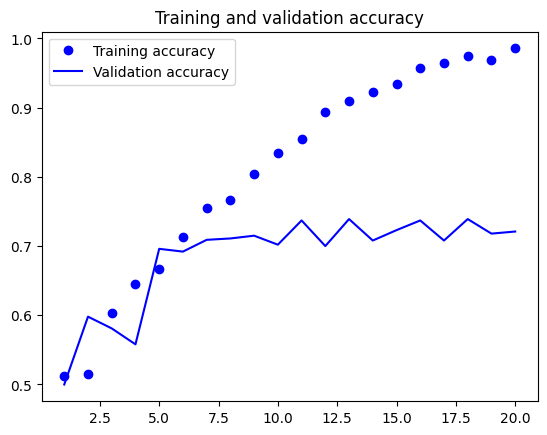

<Figure size 640x480 with 0 Axes>

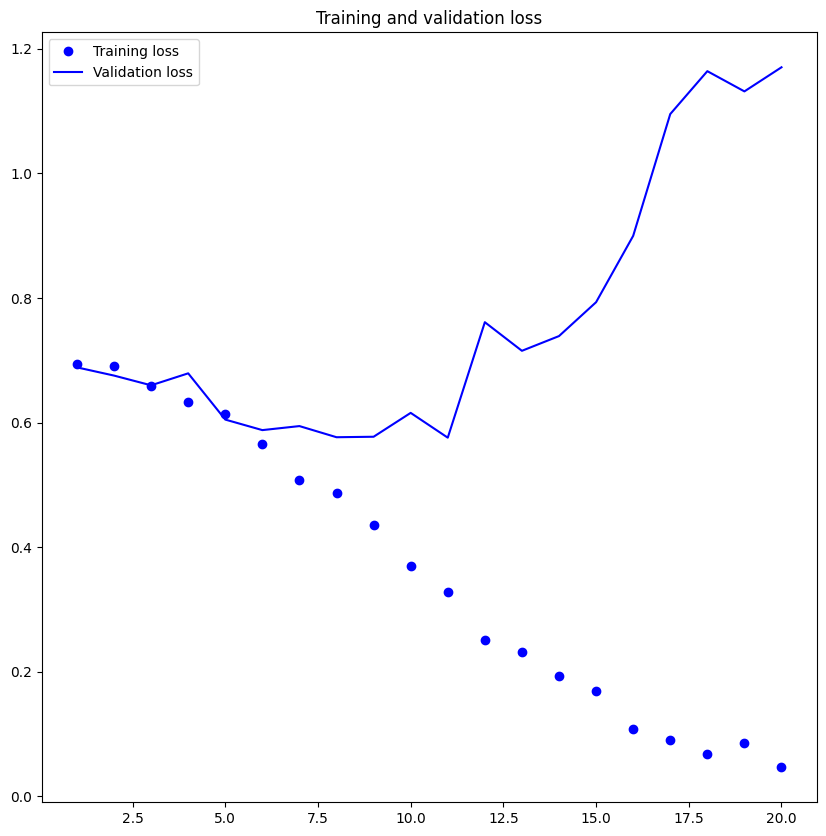

In [29]:
import matplotlib.pyplot as plt
accuracy_1000 = history_1.history["accuracy"]
val_accuracy_10000 = history_1.history["val_accuracy"]
los_1000 = history_1.history["loss"]
val_loss_1000 = history_1.history["val_loss"]
epochs = range(1, len(accuracy_1000) + 1)
plt.plot(epochs, accuracy_1000, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_10000 , "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, los_1000, "bo", label="Training loss")
plt.plot(epochs, val_loss_1000, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:
test_acc = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_acc.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5545 - accuracy: 0.7340
Test accuracy: 0.734


test accuracy with no data augmentation is about 72.5% when the Training accuracy is about 97.9%.

Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?



Define a data augmentation stage to add to an image model

In [31]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [32]:
da_augment = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

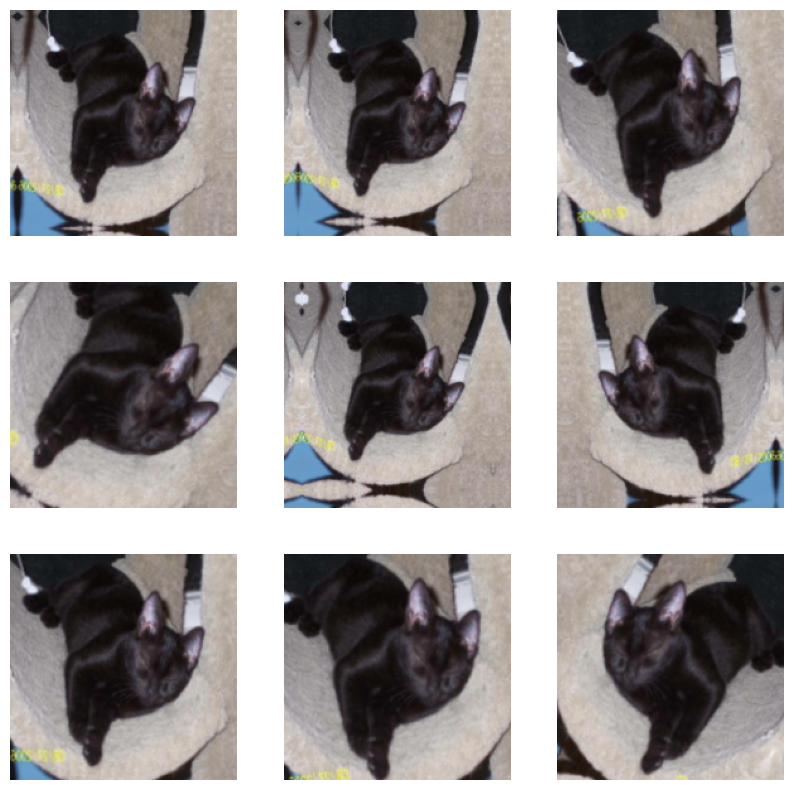

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in t_data.take(1):
    for i in range(9):
        augmentedpicss = da_augment(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmentedpicss[0].numpy().astype("uint8"))
        plt.axis("off")

Novel convolutional neural network with image enhancement and dropout

In [45]:
in2 = keras.Input(shape=(180, 180, 3))
yas2 = da_augment(in2)
yas2 = layers.Rescaling(1./255)(yas2)
yas2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(yas2)
yas2 = layers.MaxPooling2D(pool_size=2)(yas2)
yas2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(yas2)
yas2 = layers.MaxPooling2D(pool_size=2)(yas2)
yas2 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(yas2)
yas2 = layers.MaxPooling2D(pool_size=2)(yas2)
yas2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas2)
yas2 = layers.MaxPooling2D(pool_size=2)(yas2)
yas2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas2)
yas2 = layers.Flatten()(yas2)
yas2 = layers.Dropout(0.5)(yas2)
output_2 = layers.Dense(1, activation="sigmoid")(yas2)
model_2 = keras.Model(inputs=in2, outputs=output_2)

model_2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [46]:
callback_1500 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_da_augment.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_2 = model_2.fit(
    t_data,
    epochs=40,
    validation_data=v_data,
    callbacks=callback_1500)

Epoch 1/40
63/63 [==============================] - 8s 89ms/step - loss: 0.6956 - accuracy: 0.4925 - val_loss: 0.6896 - val_accuracy: 0.5360
Epoch 2/40
63/63 [==============================] - 8s 115ms/step - loss: 0.6914 - accuracy: 0.5375 - val_loss: 0.6822 - val_accuracy: 0.5450
Epoch 3/40
63/63 [==============================] - 4s 65ms/step - loss: 0.6859 - accuracy: 0.5370 - val_loss: 0.6948 - val_accuracy: 0.5530
Epoch 4/40
63/63 [==============================] - 4s 63ms/step - loss: 0.6847 - accuracy: 0.5605 - val_loss: 0.6601 - val_accuracy: 0.6210
Epoch 5/40
63/63 [==============================] - 7s 100ms/step - loss: 0.6684 - accuracy: 0.5835 - val_loss: 0.6618 - val_accuracy: 0.6050
Epoch 6/40
63/63 [==============================] - 6s 95ms/step - loss: 0.6634 - accuracy: 0.6130 - val_loss: 0.6633 - val_accuracy: 0.6110
Epoch 7/40
63/63 [==============================] - 4s 60ms/step - loss: 0.6544 - accuracy: 0.6180 - val_loss: 0.7184 - val_accuracy: 0.5570
Epoch 8/40


Test accuracy of the model

In [48]:
test_acc2 = keras.models.load_model(
    "convnet_from_scratch_with_da_augment.keras")
test_loss, test_acc = test_acc2.evaluate(t_data)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 31ms/step - loss: 0.2506 - accuracy: 0.8985
Test accuracy: 0.899


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Raising the training sample to 2000, keeping the Validation and test sets the same as before(500 samples)

In [49]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

In [52]:
in3 = keras.Input(shape=(180, 180, 3))
yas3 = da_augment(in3)
yas3 = layers.Rescaling(1./255)(in3)
yas3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(yas3)
yas3 = layers.MaxPooling2D(pool_size=2)(yas3)
yas3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(yas3)
yas3 = layers.MaxPooling2D(pool_size=2)(yas3)
yas3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(yas3)
yas3 = layers.MaxPooling2D(pool_size=2)(yas3)
yas3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas3)
yas3 = layers.MaxPooling2D(pool_size=2)(yas3)
yas3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(yas3)
yas3 = layers.Flatten()(yas3)
yas3 = layers.Dropout(0.5)(yas3)
output_3 = layers.Dense(1, activation="sigmoid")(yas3)
model_3 = keras.Model(inputs=in3, outputs=output_3)

model_3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [54]:
callback_2000 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_info.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_3 = model_3.fit(
    t_data,
    epochs=40,
    validation_data=v_data,
    callbacks=callback_2000)

Epoch 1/40
63/63 [==============================] - 5s 65ms/step - loss: 0.6933 - accuracy: 0.5085 - val_loss: 0.6913 - val_accuracy: 0.5940
Epoch 2/40
63/63 [==============================] - 4s 59ms/step - loss: 0.6854 - accuracy: 0.5465 - val_loss: 0.6868 - val_accuracy: 0.6150
Epoch 3/40
63/63 [==============================] - 6s 85ms/step - loss: 0.6911 - accuracy: 0.5275 - val_loss: 0.6788 - val_accuracy: 0.6020
Epoch 4/40
63/63 [==============================] - 4s 60ms/step - loss: 0.6622 - accuracy: 0.6120 - val_loss: 0.6616 - val_accuracy: 0.6240
Epoch 5/40
63/63 [==============================] - 4s 59ms/step - loss: 0.6297 - accuracy: 0.6365 - val_loss: 0.6588 - val_accuracy: 0.6310
Epoch 6/40
63/63 [==============================] - 7s 102ms/step - loss: 0.5945 - accuracy: 0.6795 - val_loss: 0.6383 - val_accuracy: 0.6490
Epoch 7/40
63/63 [==============================] - 6s 89ms/step - loss: 0.5761 - accuracy: 0.6980 - val_loss: 0.6483 - val_accuracy: 0.6490
Epoch 8/40
6

In [55]:
test_acc3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = test_acc3.evaluate(t_data)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 45ms/step - loss: 0.5638 - accuracy: 0.6975
Test accuracy: 0.697


Q4: Repeat Steps 1-3, but now using a pretrained network. The 
sample sizes you use in Steps 2 and 3 for the pretrained network may be the 
same or different from those using the network where you trained from 
scratch. Again, use any and all optimization techniques to get best 
performance.

Instantiating the VGG16 convolutional base

In [69]:
convolution_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [80]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [82]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(t_data)
val_features, val_labels =  get_features_and_labels(v_data)
test_features, test_labels =  get_features_and_labels(test_data)

1/1 [==============================] - 0s 19ms/step


In [83]:
train_features.shape

(2000, 5, 5, 512)

In [84]:
in4 = keras.Input(shape=(5, 5, 512))
yas4 = layers.Flatten()(in4)
yas4 = layers.Dense(256)(yas4)
yas4 = layers.Dropout(0.5)(yas4)
output_4 = layers.Dense(1, activation="sigmoid")(yas4)
model_4 = keras.Model(in4, output_4)
model_4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback_pt = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history_pt = model_4.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback_pt)

Epoch 1/20
63/63 [==============================] - 2s 15ms/step - loss: 14.0100 - accuracy: 0.9255 - val_loss: 9.4508 - val_accuracy: 0.9370
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.1254 - accuracy: 0.9820 - val_loss: 4.9601 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.6513 - accuracy: 0.9815 - val_loss: 7.1786 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.7272 - accuracy: 0.9910 - val_loss: 6.1839 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.9925 - val_loss: 5.7917 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7455 - accuracy: 0.9960 - val_loss: 6.9989 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5885 - accuracy: 0.9960 - val_loss: 6.3491 - val_accuracy: 0.9720
Epoch 8/20
63/63 [

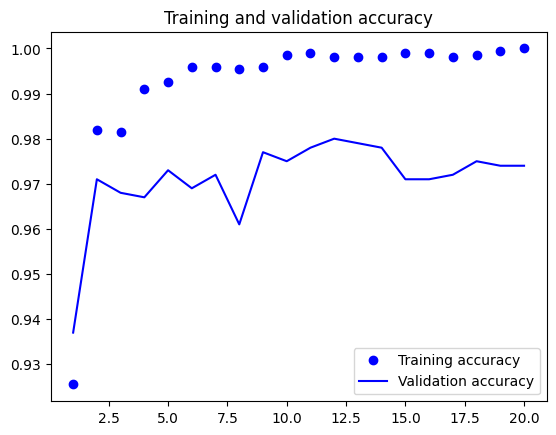

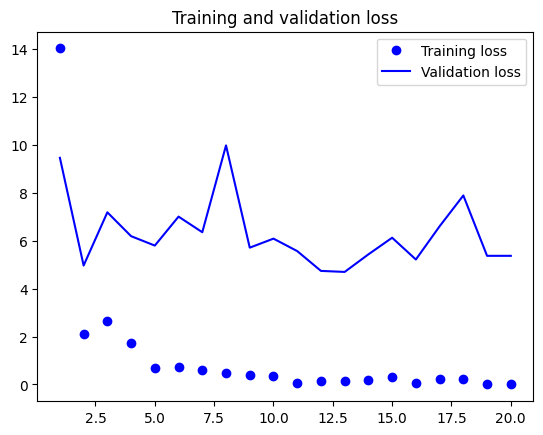

In [91]:
import matplotlib.pyplot as plt
accuracy_pt = history_pt.history["accuracy"]
valacuracy_pt = history_pt.history["val_accuracy"]
loss_pt = history_pt.history["loss"]
valloss_pt = history_pt.history["val_loss"]
epochs = range(1, len(accuracy_pt) + 1)
plt.plot(epochs, accuracy_pt, "bo", label="Training accuracy")
plt.plot(epochs, valacuracy_pt, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss_pt, "bo", label="Training loss")
plt.plot(epochs, valloss_pt, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [93]:
convolutional_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolutional_base.trainable = False

convolutional_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base.trainable_weights))

convolutional_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 26


In [100]:
da_augment2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

in42 = keras.Input(shape=(180, 180, 3))
yasx2 = da_augment2(in42)
yasx2 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(yasx2)
yasx2 = convolutional_base(yasx2)
yasx2 = layers.Flatten()(yasx2)
yasx2 = layers.Dense(256)(yasx2)
yasx2 = layers.Dropout(0.5)(yasx2)
output_ap = layers.Dense(1, activation="sigmoid")(yasx2)
model_ap = keras.Model(in42, output_ap)
model_ap.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [101]:
callback_ap = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history_ap = model_ap.fit(
    t_data,
    epochs=10,
    validation_data=v_data,
    callbacks=callback_ap
)

Epoch 1/10
63/63 [==============================] - 11s 159ms/step - loss: 19.5247 - accuracy: 0.8935 - val_loss: 2.4020 - val_accuracy: 0.9760
Epoch 2/10
63/63 [==============================] - 10s 149ms/step - loss: 5.8271 - accuracy: 0.9500 - val_loss: 2.9934 - val_accuracy: 0.9730
Epoch 3/10
63/63 [==============================] - 9s 138ms/step - loss: 5.3154 - accuracy: 0.9570 - val_loss: 2.8862 - val_accuracy: 0.9760
Epoch 4/10
63/63 [==============================] - 9s 142ms/step - loss: 6.8492 - accuracy: 0.9565 - val_loss: 4.5884 - val_accuracy: 0.9690
Epoch 5/10
63/63 [==============================] - 9s 142ms/step - loss: 4.6736 - accuracy: 0.9580 - val_loss: 3.4436 - val_accuracy: 0.9750
Epoch 6/10
63/63 [==============================] - 9s 144ms/step - loss: 3.7158 - accuracy: 0.9720 - val_loss: 9.7813 - val_accuracy: 0.9530
Epoch 7/10
63/63 [==============================] - 9s 140ms/step - loss: 3.3764 - accuracy: 0.9645 - val_loss: 3.1690 - val_accuracy: 0.9780
Epo

In [102]:
test_accl = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_accl.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 91ms/step - loss: 4.9845 - accuracy: 0.9640
Test accuracy: 0.964


Fine-tuning a pretrained model

In [104]:
convolutional_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

In [107]:
model_ap.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

call_t = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist_tt = model_ap.fit(
    t_data,
    epochs=5,
    validation_data=v_data,
    callbacks=call_t)

Epoch 1/5
63/63 [==============================] - 33s 448ms/step - loss: 2.1630 - accuracy: 0.9720 - val_loss: 1.2579 - val_accuracy: 0.9840
Epoch 2/5
63/63 [==============================] - 23s 356ms/step - loss: 1.5582 - accuracy: 0.9730 - val_loss: 1.4576 - val_accuracy: 0.9720
Epoch 3/5
63/63 [==============================] - 23s 365ms/step - loss: 0.8999 - accuracy: 0.9745 - val_loss: 1.0658 - val_accuracy: 0.9740
Epoch 4/5
63/63 [==============================] - 23s 361ms/step - loss: 0.4778 - accuracy: 0.9795 - val_loss: 1.3424 - val_accuracy: 0.9730
Epoch 5/5
63/63 [==============================] - 25s 387ms/step - loss: 0.3986 - accuracy: 0.9800 - val_loss: 0.6248 - val_accuracy: 0.9800


In [108]:
test_acc_tu = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model_ap.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 97ms/step - loss: 1.4162 - accuracy: 0.9680
Test accuracy: 0.968
